In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score

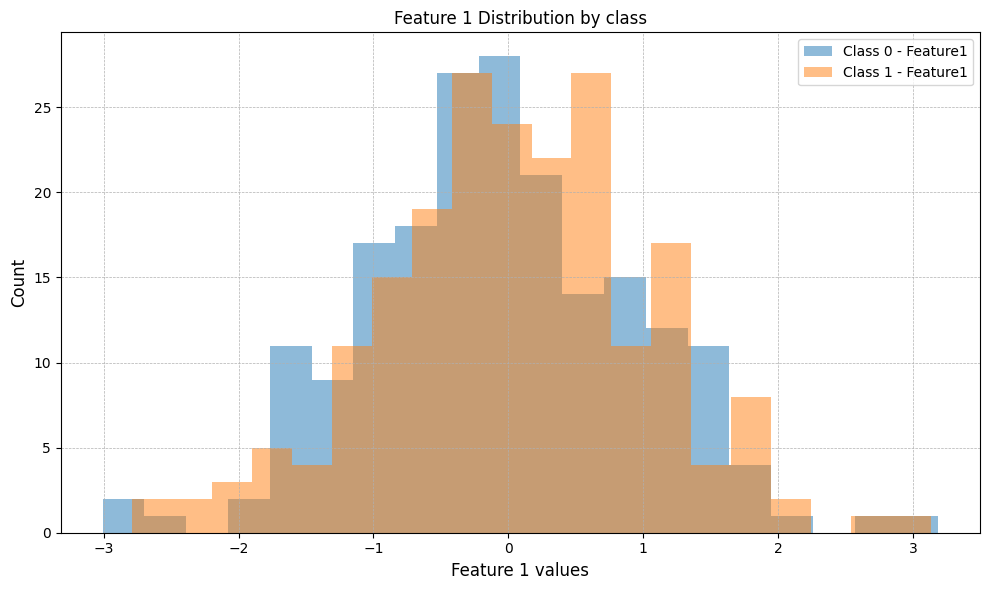

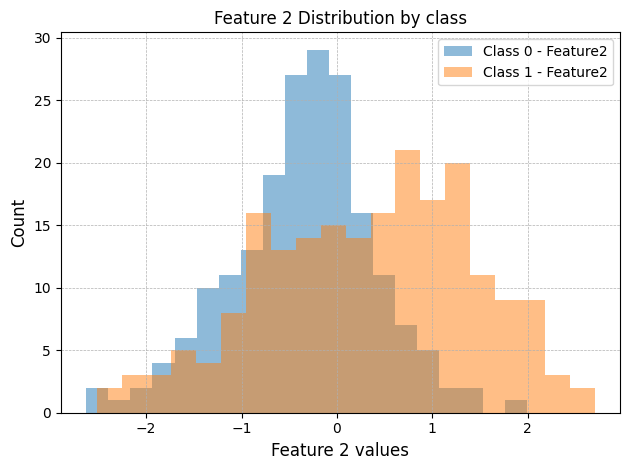

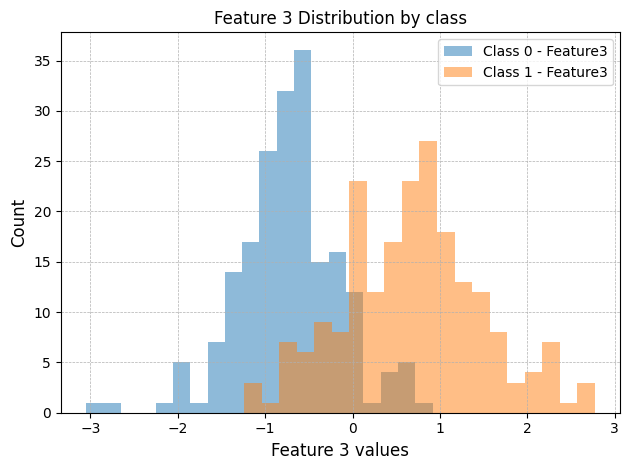

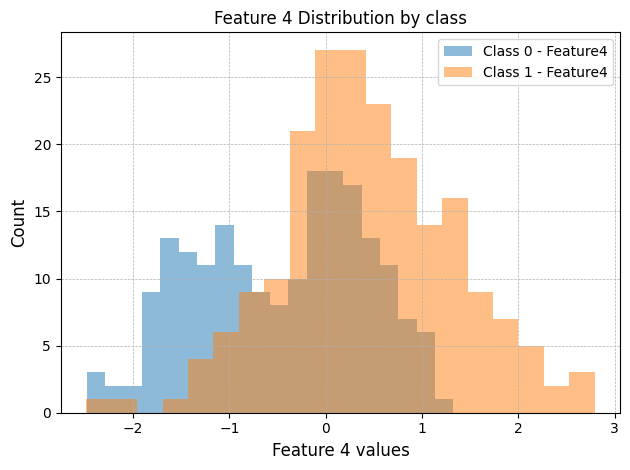

Confusion matrix:
[[43  7]
 [ 7 43]]
Accuracy:  0.8600
Precision:  0.8600
Recall:  0.8600
F1 score  0.8600


In [2]:
def evaluate_model(y_true , y_pred):
    cm = confusion_matrix( y_true , y_pred)
    acc = accuracy_score( y_true , y_pred)
    prec = precision_score( y_true , y_pred)
    rec = recall_score( y_true , y_pred )
    f1 = f1_score( y_true , y_pred )

    print("Confusion matrix:")
    print(cm)
    print(f"Accuracy: {acc : .4f}")
    print(f"Precision: {prec : .4f}")
    print(f"Recall: {rec : .4f}")
    print(f"F1 score {f1 : .4f}")

def plot_feature_distribution(X_train , y_train):
    plt.figure(figsize=( 10 , 6 ))
    for feature_idx in range(X_train.shape[1]):
        plt.hist(X_train[y_train == 0][: , feature_idx] , bins=20 , alpha = 0.5 , label=f'Class 0 - Feature{ feature_idx + 1}')
        plt.hist(X_train[y_train == 1][: , feature_idx] , bins=20 , alpha = 0.5 , label=f'Class 1 - Feature{feature_idx + 1}')
        plt.title(f'Feature {feature_idx + 1} Distribution by class' , fontsize = 12)
        plt.xlabel(f'Feature {feature_idx + 1} values' , fontsize= 12)
        plt.ylabel('Count' , fontsize = 12)
        plt.legend(loc = 'upper right')
        plt.grid(True , linestyle = '--' , linewidth = 0.5)
        plt.tight_layout()
        plt.show()

def main():
    X , y = make_classification(n_samples=500 , n_features=4 , n_informative=3 , n_redundant=0 , n_classes=2 , random_state=42)
    X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    plot_feature_distribution(X_train_scaled , y_train)

    model = GaussianNB()
    model.fit(X_train_scaled , y_train)

    y_pred = model.predict(X_test_scaled)
    evaluate_model(y_test , y_pred)

if __name__ == "__main__":
    main()